<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

_author The arbitrary and capricious heart of data science_

---

### Let us begin...

Recall the "data science process."
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, \
accuracy_score, recall_score, precision_score, classification_report, f1_score
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data and  preview data 
df = pd.read_csv('./401ksubs.csv')
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [3]:
#View number of row and columns of dataset
df.shape

(9275, 11)

In [4]:
#View summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e401k   9275 non-null   int64  
 1   inc     9275 non-null   float64
 2   marr    9275 non-null   int64  
 3   male    9275 non-null   int64  
 4   age     9275 non-null   int64  
 5   fsize   9275 non-null   int64  
 6   nettfa  9275 non-null   float64
 7   p401k   9275 non-null   int64  
 8   pira    9275 non-null   int64  
 9   incsq   9275 non-null   float64
 10  agesq   9275 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 797.2 KB


In [5]:
#View statistical properties of dataset
df.describe().round(2)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.00,9275.00,9275.00,9275.0,9275.00,9275.00,9275.00,9275.00,9275.00,9275.00,9275.00
mean,0.39,39.25,0.63,0.2,41.08,2.89,19.07,0.28,0.25,2121.19,1793.65
std,0.49,24.09,0.48,0.4,10.30,1.53,63.96,0.45,0.44,3001.47,895.65
min,0.00,10.01,0.00,0.0,25.00,1.00,-502.30,0.00,0.00,100.16,625.00
25%,0.00,21.66,0.00,0.0,33.00,2.00,-0.50,0.00,0.00,469.16,1089.00
50%,0.00,33.29,1.00,0.0,40.00,3.00,2.00,0.00,0.00,1108.09,1600.00
75%,1.00,50.16,1.00,0.0,48.00,4.00,18.45,1.00,1.00,2516.03,2304.00
max,1.00,199.04,1.00,1.0,64.00,13.00,1536.80,1.00,1.00,39617.32,4096.00


In [6]:
df.marr.value_counts()

1    5830
0    3445
Name: marr, dtype: int64

In [7]:
df.fsize.value_counts()

2     2199
1     2017
4     1990
3     1829
5      816
6      268
7       95
8       38
10       7
9        7
12       4
11       3
13       2
Name: fsize, dtype: int64

In [8]:
#Check for missing values
df.isnull().sum().sum()

0

In [9]:
 #Find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 11 numerical variables

The numerical variables are :

 ['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k', 'pira', 'incsq', 'agesq']


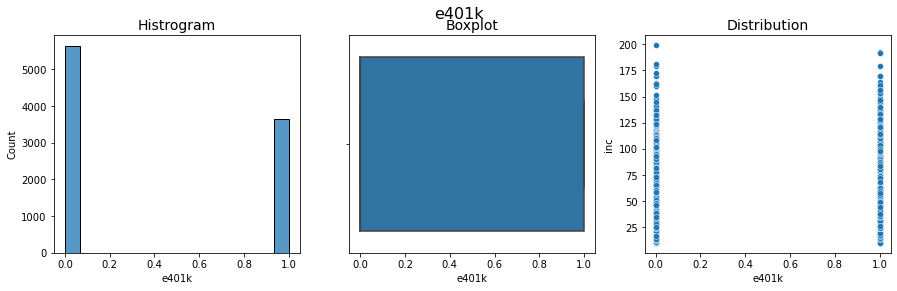

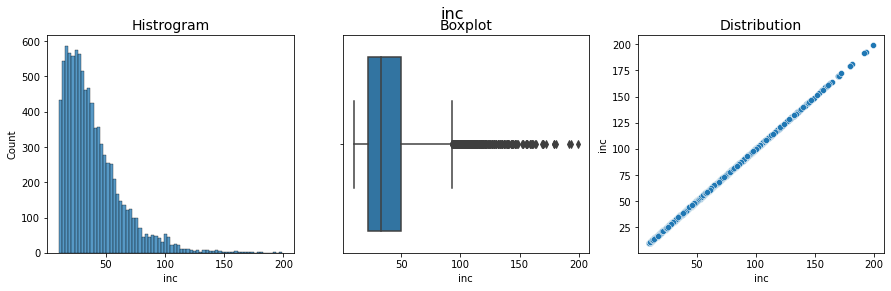

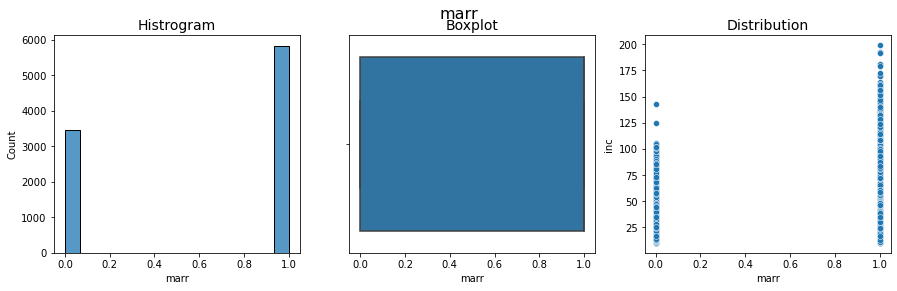

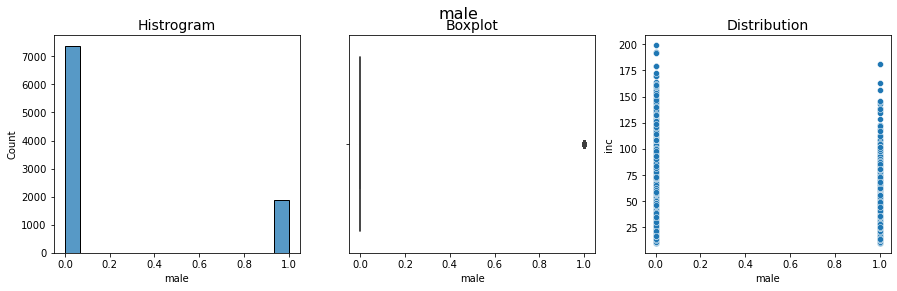

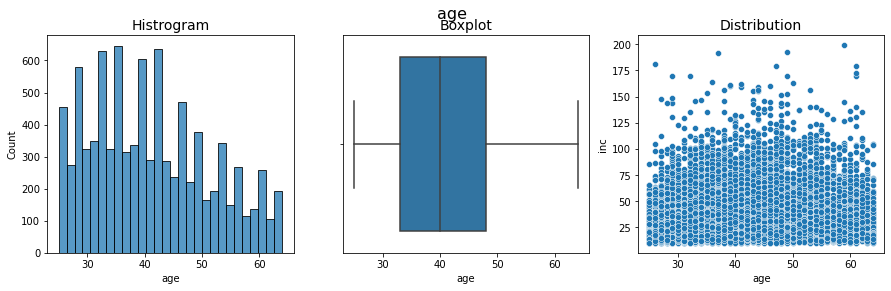

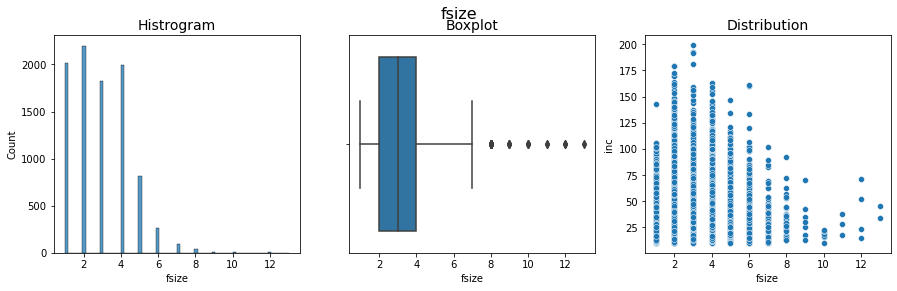

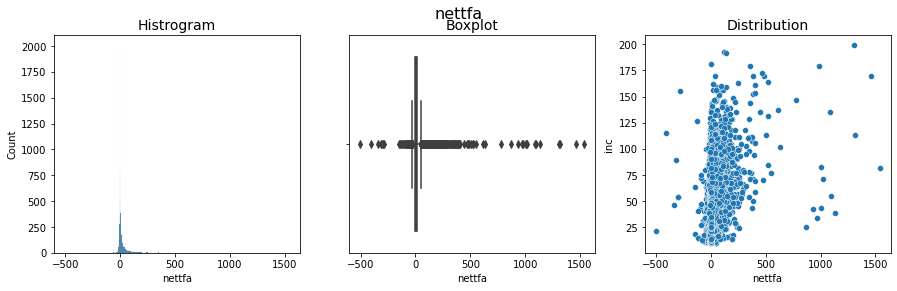

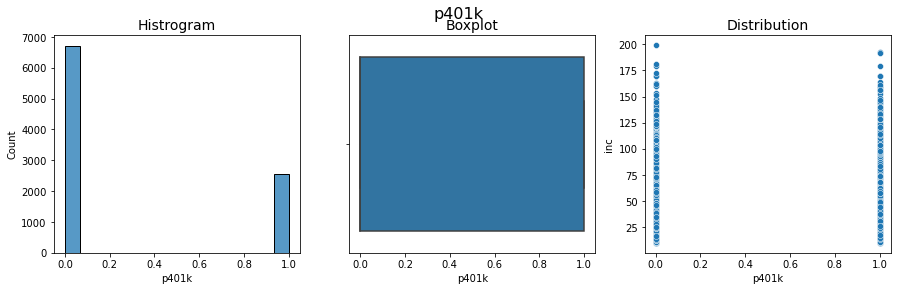

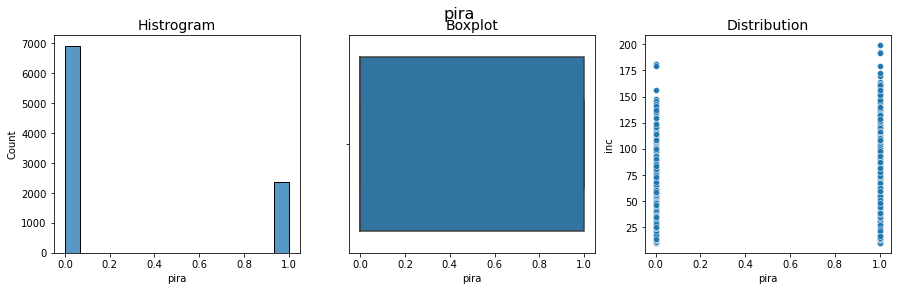

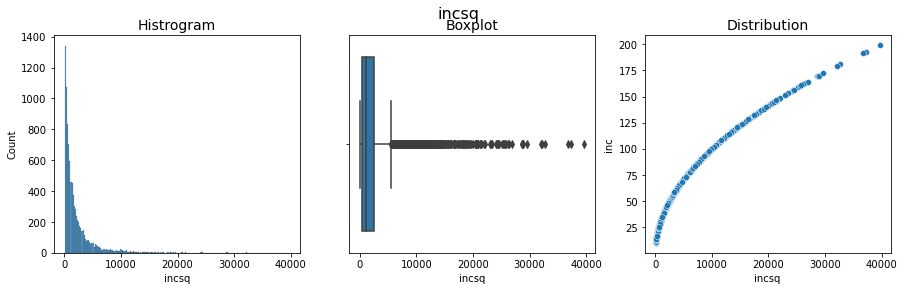

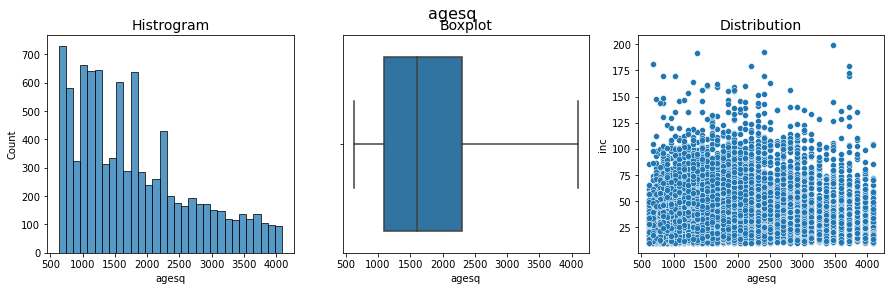

In [10]:
for col in numerical:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    ax = ax.ravel() 
    fig.suptitle(f"{col}\n", fontsize=16)
    ax[0].set_title(f'Histrogram', fontsize =14)
    sns.histplot(df[col], ax=ax[0])
    ax[1].set_title(f'Boxplot', fontsize =14)
    sns.boxplot(x=df[col], ax=ax[1])
    ax[2].set_title(f'Distribution', fontsize =14)
    sns.scatterplot(x = df[col], y= df['inc'],ax=ax[2])
    plt.show()

##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [11]:
# Martial status should have more category such as single, married, divorced, or widowed
# number of years of investment
#location (https://smartasset.com/retirement/401k-calculator)


##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [12]:
#Assuming that race is contribute to someone's income is quite unethical. 
#There could be others variables associate with race that can predict someone's income. 

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [13]:
#incsq which is income^2 because they are basically the same variable. 

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

In [14]:
#incsq = inc^2
# agesq = age^2
#In general the invesment is accumulated in nature, thus the trend of growth of invesment si not linear, mostly polynimial trend. 

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [15]:
#inc is descrbed incorrectly as  inc^2. it should be described as inc.
#age is also descrbed incorrectly as  age^2. it should be described as age.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [16]:
#comparing coefficients from linear regression using standard scaler
#or use decision tree regressor model and explore features in each node. The top features will be the best predict one's income


##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [17]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [18]:
#Assembly X and y
X = df[['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']]
#X = pd.get_dummies(columns=[ 'marr', 'male'], drop_first =True, data =X)
y = df['inc']

scaler = StandardScaler()  #scaler object

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)  #splitting into training and test
#kfold = KFold(n_splits=10, random_state=99, shuffle=True)   #kfold cross validation object with 10 splits

X_train_sc = scaler.fit_transform(X_train)  #scaling training set
X_test_sc = scaler.transform(X_test)  #scaling test set


### Linear Regression

In [19]:
reg = LinearRegression() 
reg.fit(X_train_sc, y_train)

LinearRegression()

In [20]:
import time
t0 = time.time()

reg = LinearRegression() 
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_test_sc)

print('Linear Regression\n')
print(f'Train R-squared Score: {reg.score(X_train_sc, y_train)}')
print(f'Test R-squared Score: {reg.score(X_test_sc, y_test)}')
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'RMSE is : {rmse}' )
duration= time.time() - t0
print(f"How long did this all take to run: {duration}")

Linear Regression

Train R-squared Score: 0.30065902255610066
Test R-squared Score: 0.26103635936705916
RMSE is : 21.12958918311418
How long did this all take to run: 0.003988027572631836


In [21]:
pd.Series(reg.coef_, index = X.columns)

marr      10.145460
male       1.115035
age       29.139281
fsize     -3.209826
nettfa     8.576356
agesq    -28.957902
dtype: float64

### Decision Tree Regressor

In [22]:
import time
t0 = time.time()

params = {'max_depth': [3,4, 5], # The maximum depth of the tree
          'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [3, 5, 7], # The minimum number of samples required to be at a leaf node
          'min_samples_split': [0.1, 1.0], # The minimum number of samples required to split an internal node
          'criterion': ['mse'] #The function to measure the quality of a split
         }

tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train_sc, y_train)
print(rs.best_estimator_)


tree = rs.best_estimator_
tree.fit(X_train_sc, y_train)
y_pred = tree.predict(X_test)
rmse_dt = mean_squared_error(y_test, y_pred, squared=False)
duration= time.time() - t0
print('Decision Tree Regressor\n')
print(f'Score on training set: {tree.score(X_train_sc, y_train)}')
print(f'Score on testing set: {tree.score(X_test_sc, y_test)}')
print(f'Root Mean Squared Error: {rmse_dt}')

print(f"How long did this all take to run: {duration}")

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
                      min_samples_leaf=3, min_samples_split=0.1)
Decision Tree Regressor

Score on training set: 0.38174206557336243
Score on testing set: 0.36895599104323173
Root Mean Squared Error: 33.612969306425754
How long did this all take to run: 3.0787646770477295


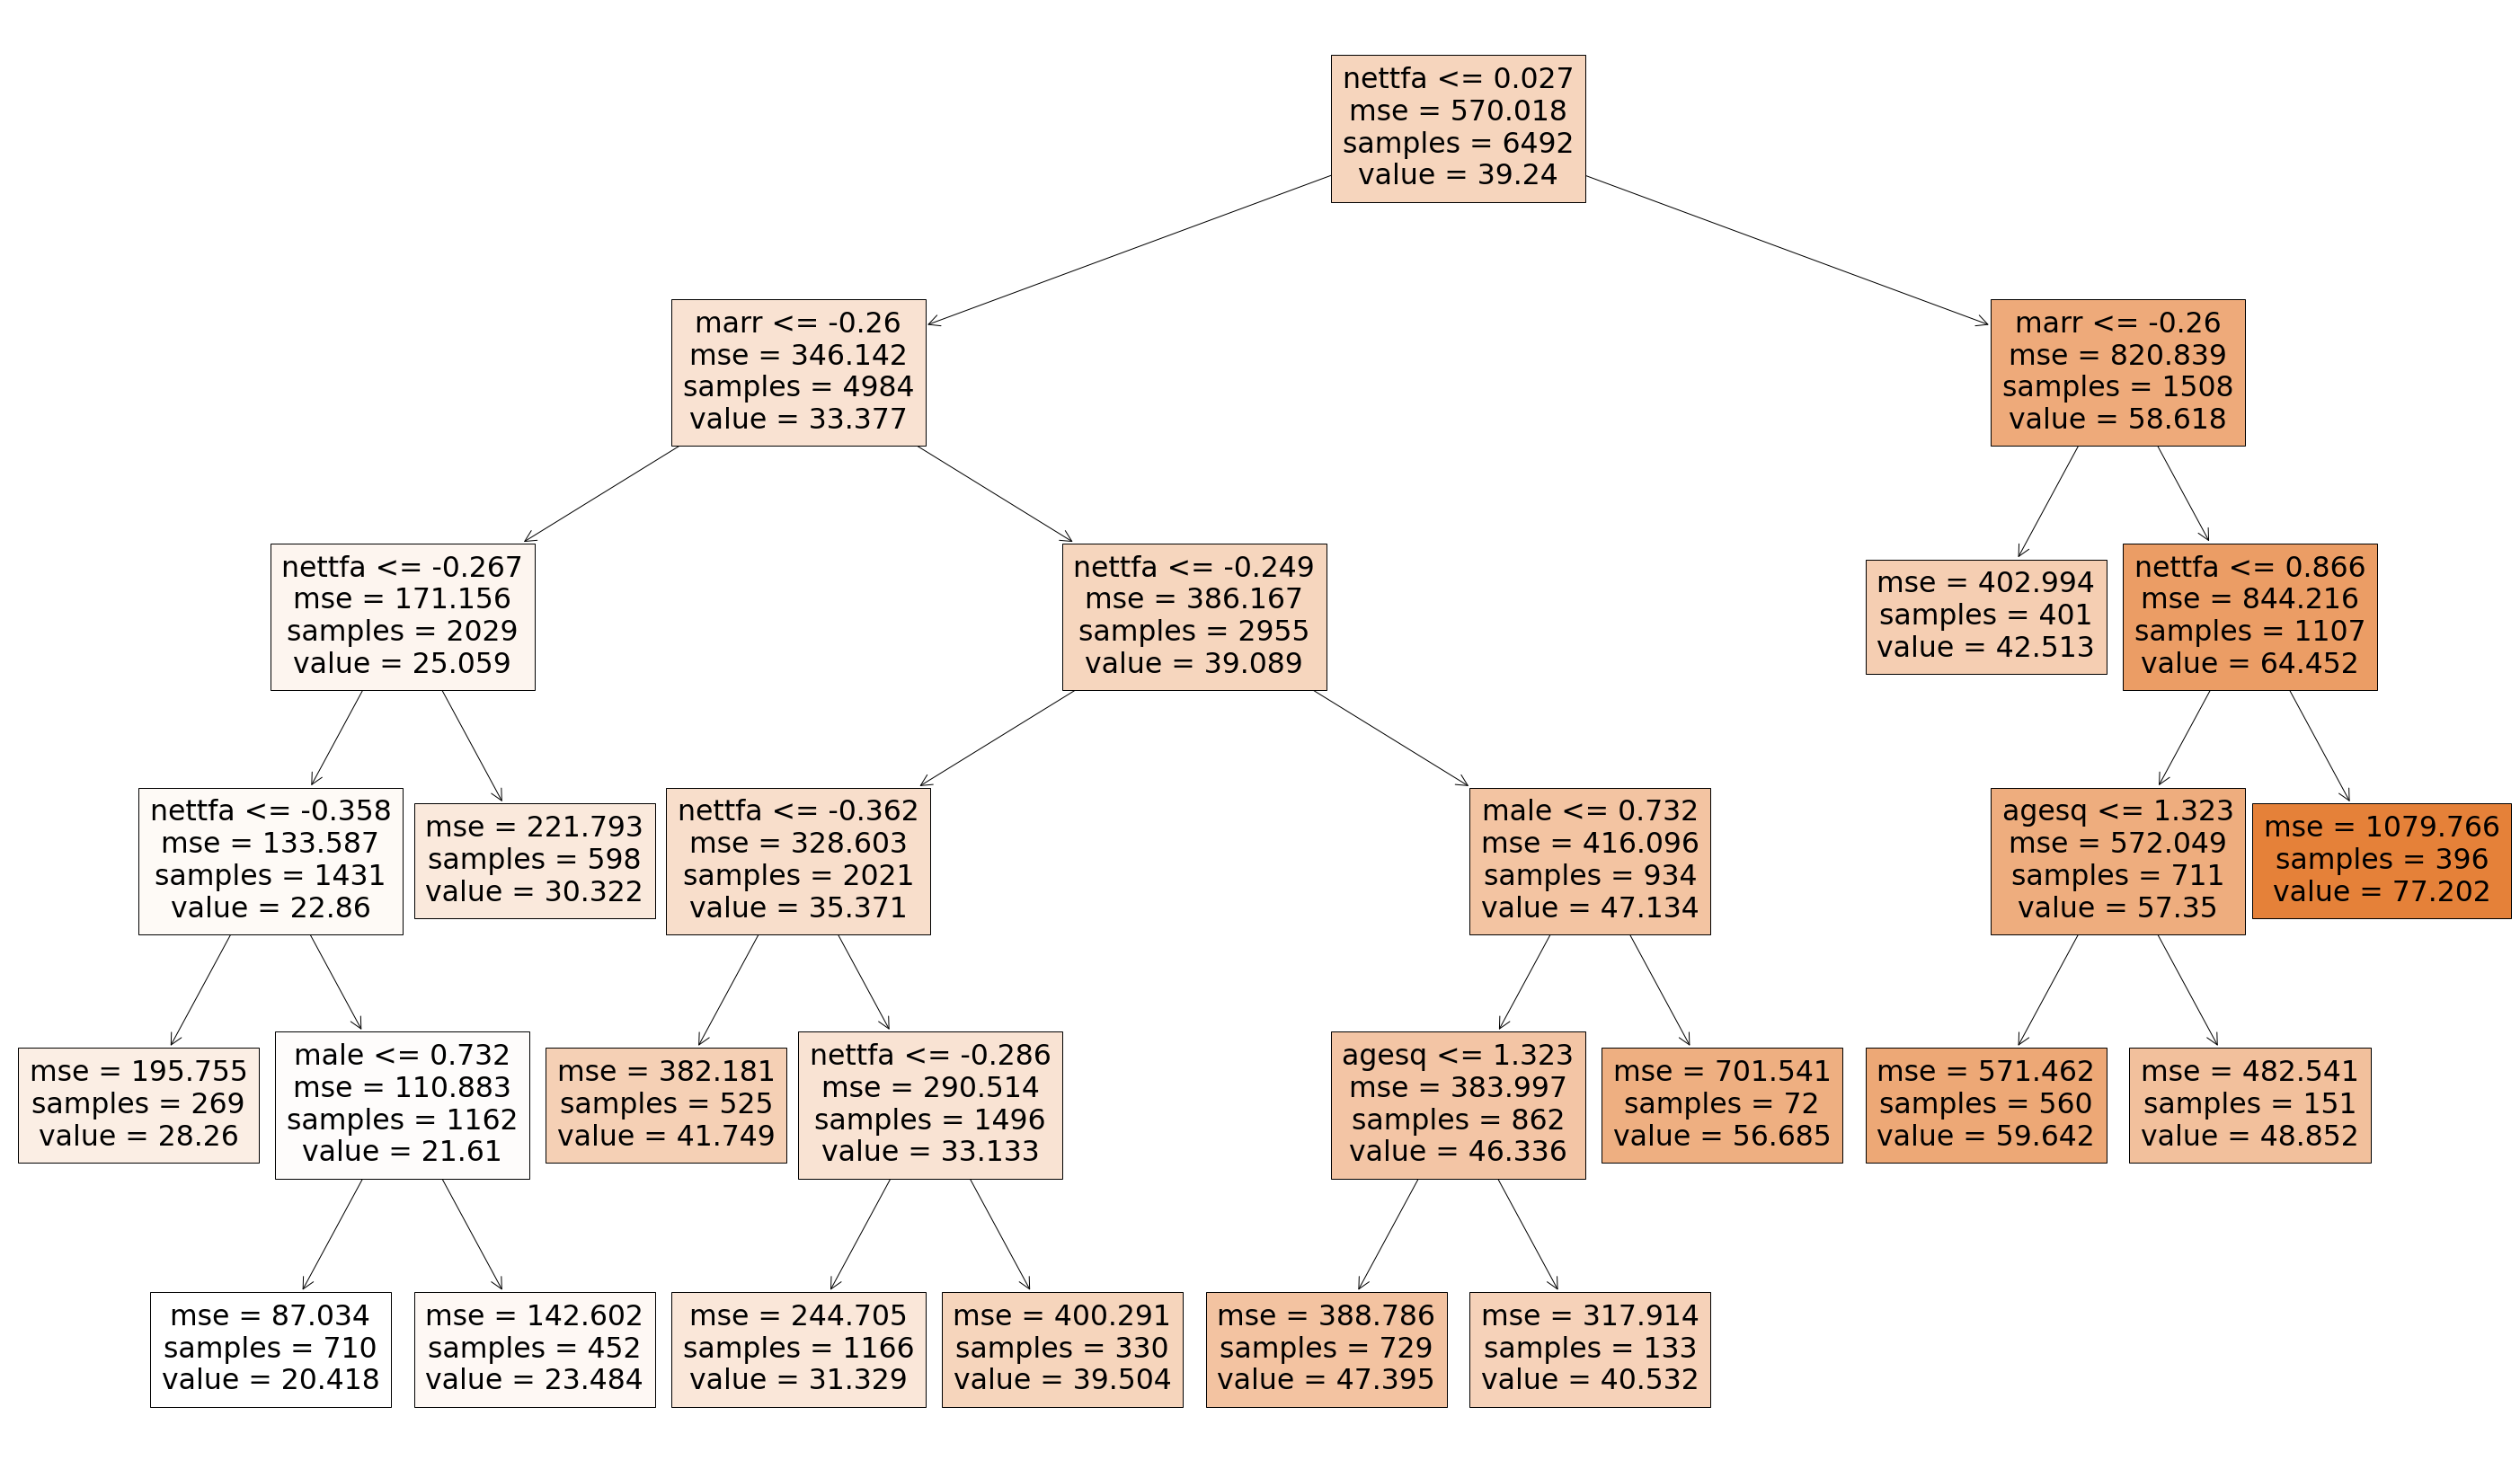

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (50, 30))
plot_tree(tree, feature_names= X.columns, filled= True);

### Bagged Decision Tree


In [24]:
# Instantiate BaggingRegressor
bag = BaggingRegressor(random_state=42)

# Fit BaggingClassifier
bag.fit(X_train_sc, y_train)

y_pred = bag.predict(X_test)
rmse_bag = mean_squared_error(y_test, y_pred, squared=False)
duration= time.time() - t0
print('Bagging Decision Tree Regressor\n')
print(f'Score on training set: {bag.score(X_train_sc, y_train)}')
print(f'Score on testing set: {bag.score(X_test_sc, y_test)}')
print(f'Root Mean Squared Error: {rmse_bag}')

Bagging Decision Tree Regressor

Score on training set: 0.8662055982940626
Score on testing set: 0.263101672180559
Root Mean Squared Error: 64.93113086561584


##### 9. What is bootstrapping?

In [25]:
 # bootstrapping is random resampling with replacement.
# The idea is this:
#Take your original sample of data, with sample size  𝑛 .
#Take many sub-samples (say  𝐵 ) of size  𝑛  from your sample with replacement. 
#These are called bootstrapped samples.
#You have now generated  𝐵  bootstrapped samples, where each sample is of size  𝑛 !

#Instead of building one model on our original sample, we will now build one model on each bootstrapped sample, giving us  𝐵  models in total!
#Experience tells us that combining the models from our bootstrapped samples will be closer to what we'd see from the population
#than to just get one model from our original sample.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

In [26]:
#A decision tree is one model using original sample. 
#Bagged decision trees is combination of decision from models using bootstrapped samples. 

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In [27]:
#Random forests differ from bagging decision trees in only one way: they use a modified tree learning algorithm that selects, 
#at each split in the learning process, a random subset of the features. This process is sometimes called the random subspace method.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In [28]:
#With bagged decision trees, we generate many different trees on pretty similar data. 
#These trees are strongly correlated with one another. Because these trees are correlated with one another, they will have high variance

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [29]:
print(f'Linear Regression RMSE is : {rmse} \n')
print(f'Decision Tree Regressor RMSE is : {rmse_dt}\n')
print(f'Bagging Decision Tree Regressor is {rmse_bag}')

Linear Regression RMSE is : 21.12958918311418 

Decision Tree Regressor RMSE is : 33.612969306425754

Bagging Decision Tree Regressor is 64.93113086561584


In [30]:
# Bagging Decision Tree regressor produces the biggest RMSE than Linear regression

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [31]:
#Bagging Decision Tree Regressor it definately overfitting. it produces the biggest gap between trainning data and testing data. 
# While there is no big difference between training RMSE and testing RMSE in Linear regression and decision tree. 
# However, Linear Regression model could be slightly overfit.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [32]:
#Linear Regression. Because, eventhough the R2 from linear regresion model is smaller and slightly overfitting comparing to Decision Tree,
#the RMSE is smaller and the interpretation of coefficients is simple to understand and more appropiate to the question. 

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [33]:
df.head(3)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936


In [34]:
#1. dealing with outliers
#2. features engneering such as grouping ages into categorical, or explore other interaction terms among variables 

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [35]:
correlation = df['e401k'].corr(df['p401k'])
correlation 

0.769169623253434

In [36]:
# the correlation between people who are eligble for 401(k) and people who participate in 401(k) are high indicating that people who are eligble for 401(k)
#usually participate in 401(k) too. Putting in 'p401k' in the model is like putting target variable in the model which will not be benefitcial to the model.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

    - K-Nearest Neighbours
        pro:  simple to implement, robust to noisy training data, and effective if training data is large
        con: Need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples
    - Logistic Regression (appropiate for binary classification)
        pro: is most useful for understanding the influence of several independent variables on a single outcome variable.
        con : Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values
    - Decision Tree (appropiate for binary classification)
        pro:  is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data
        con: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.
      - Random Forest (appropiate for binary classification)
         pro:  Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.
        con : Slow real time prediction, difficult to implement, and complex algorithm.
source https://analyticsindiamag.com/7-types-classification-algorithms/

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [37]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [38]:
#Assembly X and y
X = df.drop(['e401k', 'p401k'], axis = 'columns')
y = df['e401k']
scaler = StandardScaler()  #scaler object

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state=42, 
                                                    stratify = y)  #splitting into training and test
#kfold = KFold(n_splits=10, random_state=99, shuffle=True)   #kfold cross validation object with 10 splits

X_train_sc = scaler.fit_transform(X_train)  #scaling training set
X_test_sc = scaler.transform(X_test)  #scaling test set

### KNN

In [39]:
knn_params = {'n_neighbors': range(1, 11, 5),
              'metric': ['euclidean', 'manhattan']} 

# Instantiate our GridSearchCV object
knn_gridsearch = GridSearchCV(
                              KNeighborsClassifier(),                 
                              knn_params,             
                              cv=5,
                              verbose=1)
# Fit the GridSearchCV object to the training data
knn_gridsearch.fit(X_train_sc, y_train)
y_preds = knn_gridsearch.predict(X_test_sc)
print('KNeighborsClassifier\n')
print(f'knn best score : {knn_gridsearch.best_score_}')
print(f'knn best parameters : {knn_gridsearch.best_params_}')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
KNeighborsClassifier

knn best score : 0.6415603563722716
knn best parameters : {'metric': 'manhattan', 'n_neighbors': 6}


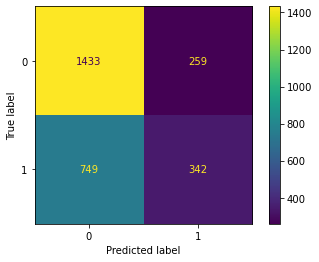

In [40]:
# Generate confusion matrix.
cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn_gridsearch.classes_).plot();

In [44]:
# Calculate sensitivity (True Positive Rate or Recall)

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

# Calculate specificity (True Negative Rate)

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

f1 = f1_score(y_test, y_preds)

print(f'F1 score : {round(f1, 4)}')


Sensitivity: 0.3135
Specificity: 0.8469
F1 score : 0.4043


### Decision tree

In [58]:
import time
t0 = time.time()

params_tree_class = {'max_depth': [2, 3, 5, 7],
                                 'min_samples_split': [5, 10, 15, 20],
                                 'min_samples_leaf': [2, 3, 4, 5, 6],
                                 'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 
                                               10]}
                     
tree_class = DecisionTreeClassifier()
grid_tree_class = GridSearchCV(estimator=tree_class, param_grid=params_tree_class , cv=5, verbose=1)
grid_tree_class.fit(X_train_sc, y_train)
print(grid_tree_class.best_estimator_)
tree= grid_tree_class.best_estimator_
y_preds = grid_tree_class.predict(X_test_sc)
duration= time.time() - t0
print('Decision Tree Regressor\n')
print(f'Score on training set: {grid_tree_class.score(X_train_sc, y_train)}')
print(f'Score on testing set: {grid_tree_class.score(X_test_sc, y_test)}')
print(f'Decision Tree  best parameters : {grid_tree_class.best_params_}')
print(f"How long did this all take to run: {duration}")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=5,
                       min_samples_split=20)
Decision Tree Regressor

Score on training set: 0.6943930991990142
Score on testing set: 0.6805605461731944
Decision Tree  best parameters : {'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
How long did this all take to run: 18.67178964614868


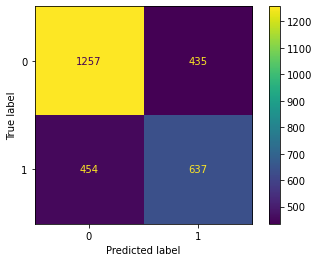

In [46]:
# Generate confusion matrix.
cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_tree_class.classes_).plot();

In [55]:
# Calculate sensitivity (True Positive Rate or Recall)

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

# Calculate specificity (True Negative Rate)

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')
f1 = f1_score(y_test, y_preds)

print(f'F1 score : {round(f1, 4)}')

Sensitivity: 0.4867
Specificity: 0.5745
F1 score : 0.4535


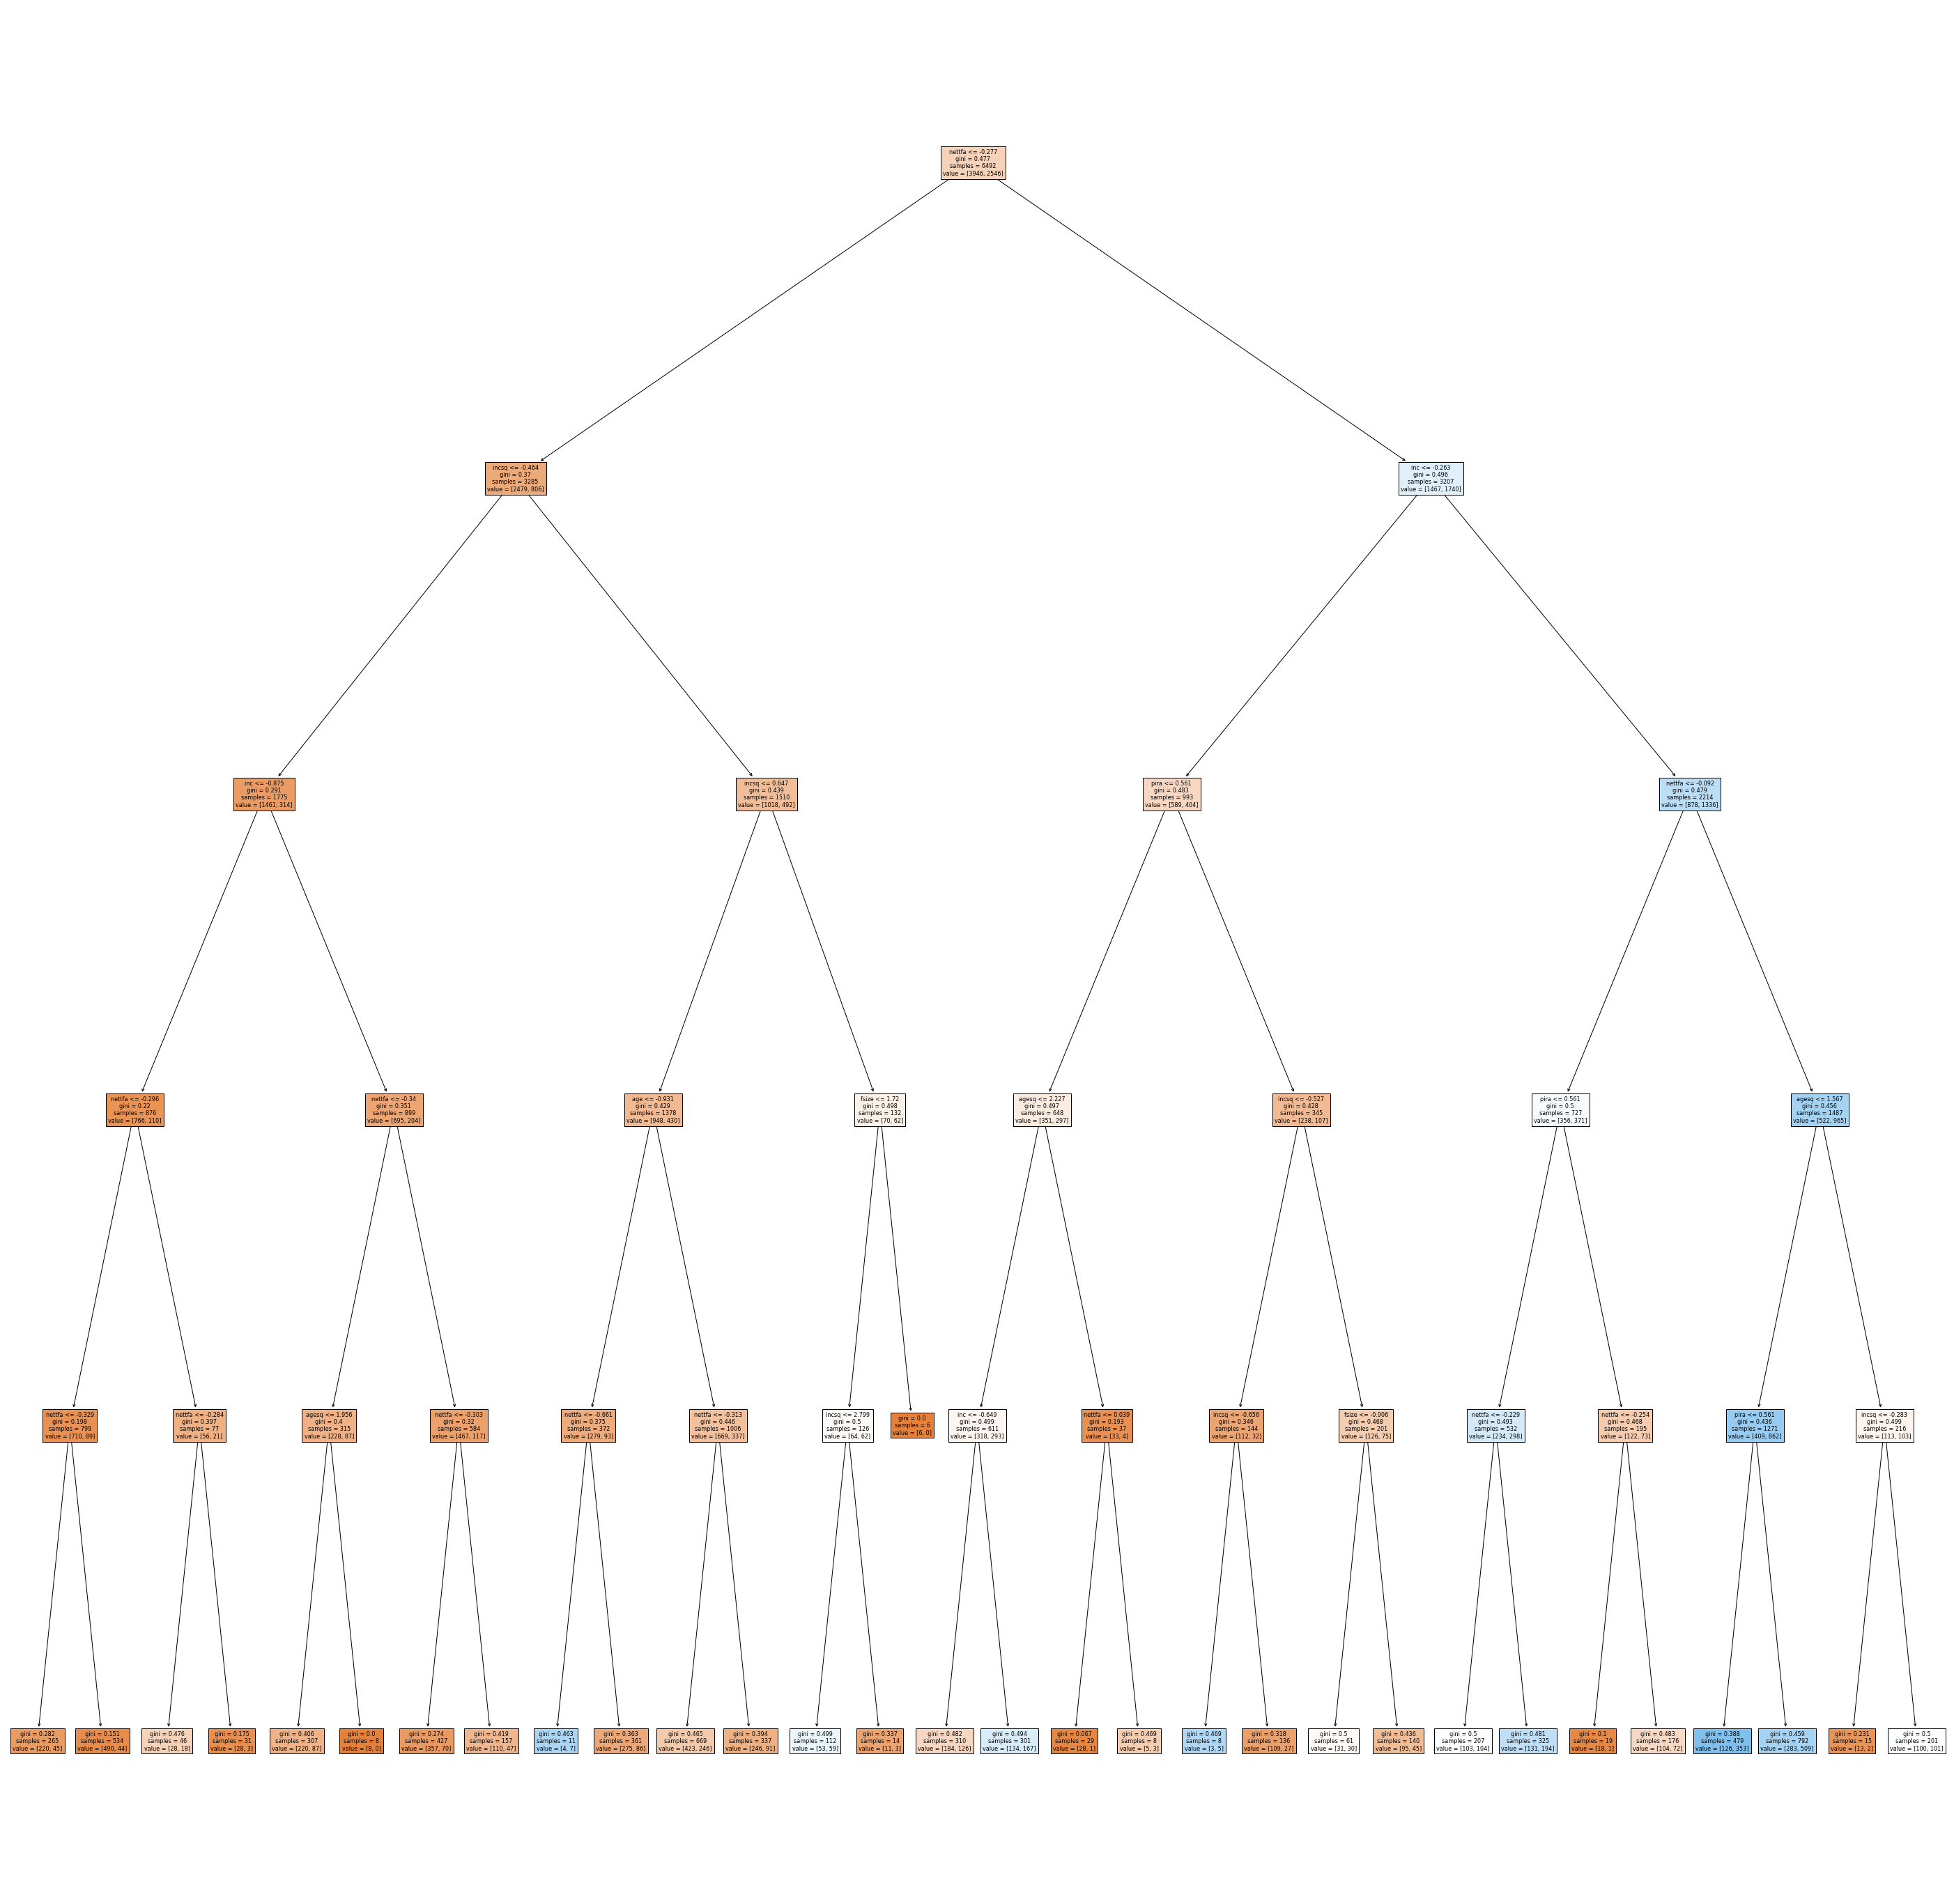

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (50, 50))
plot_tree(tree, feature_names= X.columns, filled= True);

### Logistic regression

In [48]:
# Instantiate model
import time
t0 = time.time()

params_logreg  = {'penalty': ['l1', 'l2'],
                                 'C': [0.1, 0.5, 1, 10]}

logreg = LogisticRegression()

grid_logreg = GridSearchCV(estimator=logreg, param_grid=params_logreg , cv=5, verbose=1)
grid_logreg.fit(X_train, y_train)
print(grid_logreg.best_estimator_)

y_preds = grid_logreg.predict(X_test_sc)
duration= time.time() - t0
print('Logistic regression\n')
print(f'Score on training set: {grid_logreg.score(X_train_sc, y_train)}')
print(f'Score on testing set: {grid_logreg.score(X_test_sc, y_test)}')
print(f'Decision Tree  best parameters : {grid_logreg.best_params_}')
print(f"How long did this all take to run: {duration}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
LogisticRegression(C=1)
Logistic regression

Score on training set: 0.5398952556993223
Score on testing set: 0.5400646784045994
Decision Tree  best parameters : {'C': 1, 'penalty': 'l2'}
How long did this all take to run: 0.5535621643066406


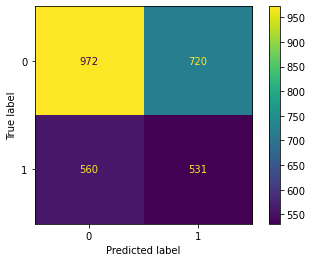

In [49]:
# Generate confusion matrix.
cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_tree_class.classes_).plot();

In [50]:
# Calculate sensitivity (True Positive Rate or Recall)

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

# Calculate specificity (True Negative Rate)

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

f1 = f1_score(y_test, y_preds)

print(f'F1 score : {round(f1, 4)}')

Sensitivity: 0.4867
Specificity: 0.5745
F1 score : 0.4535


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [ ]:
#False Positives: Someone that the model predicts is eligible for a 401(k), but actually is not.
#False positives or fp from KNN is 259, fp from Decision tree is 435,  fp from logistic regression is 720
#False Negatives:  Someone that the model predicts is not eligible for a 401(k), but actually is.
# false negatives or fn from KK is 749, fp from Decision tree is 454,  fp from logistic regression is 560

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [ ]:
# In this question we try to predict whether or not one is eligible for a 401k. In this case, we will try to minimize false negatives so all eligibel will have chace
#participate in the 401k investment or funding.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [ ]:
#When we want to reducing False Negatives, we will optimize the Sensitivity metric or change the decision boundary line from the basic 0.5 to below 0.5 when reducing False Negatives.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [ ]:
#The F1 score is the harmonic mean of precision and recall.

#If you care about precision and recall roughly the same amount, F1 score is a great metric to use.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [ ]:
#F1 scores from DecisionTreeClassifier is the highest 

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [52]:
y_preds_train = knn_gridsearch.predict(X_train_sc)
f1_train = f1_score(y_train, y_preds_train)
print(f'KNN F1 score for training data : {round(f1_train, 4)}')

y_preds_test = knn_gridsearch.predict(X_test_sc)
f1_test = f1_score(y_test, y_preds_test)
print(f'KNN F1 score for training data : {round(f1_test, 4)}')


KNN F1 score for training data : 0.5607
KNN F1 score for training data : 0.4043


In [53]:
y_preds_train = grid_tree_class.predict(X_train_sc)
f1_train = f1_score(y_train, y_preds_train)
print(f'Decision Tree F1 score for training data : {round(f1_train, 4)}')

y_preds_test = grid_tree_class.predict(X_test_sc)
f1_test = f1_score(y_test, y_preds_test)
print(f'Decision Tree F1 score for training data : {round(f1_test, 4)}')


Decision Tree F1 score for training data : 0.6018
Decision Tree F1 score for training data : 0.589


In [54]:
y_preds_train = grid_logreg.predict(X_train_sc)
f1_train = f1_score(y_train, y_preds_train)
print(f'Logistic Regression F1 score for training data : {round(f1_train, 4)}')

y_preds_test = grid_logreg.predict(X_test_sc)
f1_test = f1_score(y_test, y_preds_test)
print(f'Logistic Regression F1 score for training data : {round(f1_test, 4)}')

Logistic Regression F1 score for training data : 0.4498
Logistic Regression F1 score for training data : 0.4535


In [ ]:
#There is evidence showing that KNN is slightly over fitting, 
# however, there is no evidence showing Decision Tree and logistic regression are overfitting 


##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [ ]:
#I will choose Decision Tree because it has the highest accuacy and F1 scores, and the model is not overfitting 

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [ ]:
#I will applly bagging technique with Decision Tree model
#or I will try Random Forest or Adaboost

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

In [ ]:
# The features that will be the best predict one's income are age , square of age and martial status. 
# However, the performance of the modelt good. It can explain only 30% of the variance in the dependent variable 
# that the independent variables explain collectively

In [ ]:
#The Decision tree model is the best model to predict whether or not one is eligible for a 401k, with accuracy about 69%, 
#Sensitivity about 58%  and Specificity about 74%